In [1]:
'''
<Transfer Learning with Fine-tuning>
In this script, we implement a simple transfer learning example with fine-tuning for the task of classifying
cats and dogs using a trained model of InceptionV3 on ImageNet dataset. 
We remove the last FC layers of the InceptionV3 and attach a simple top model classifier. 
We have also chosen to fine tune the last block (block5) of inceptionv3 model and our top model which would increase the accuracy.
'''

from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.models import Model

# set parameters here
# path to top model weights
top_model_weights_path = 'C:\\Users\\sseyyedi\\bottleneck_fc_model_inceptionv3.h5'
# image size
img_width, img_height = 150, 150
# path to train and validation data, note that each folder includes subfolders of subtypes, e.g. cat and dog
train_data_dir = 'C:\\Users\\sseyyedi\\Documents\\data\\all\\train'
validation_data_dir = 'C:\\Users\\sseyyedi\\Documents\\data\\all\\validation'
# total number of images for training
nb_train_samples = 2000
# total number of images for validation
nb_validation_samples = 800

epochs = 50
batch_size = 16

# load inceptionv3 network with ImageNet weights as base_model
base_model = applications.InceptionV3(weights='imagenet', include_top=False, input_shape = (img_width, img_height, 3))
print('VGG19 model is loaded ...')

# build a top classifier model and attach to the VGG19 model
top_model = Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))
print('Top model is created ...')


# load top model trained weightes
top_model.load_weights(top_model_weights_path)
print('Top model weights loaded ...')

# add the model on top of the convolutional base
# model.add(top_model)
model = Model(input= base_model.input, output= top_model(base_model.output))

# set the first 60 layers of inceptionv3 to non-trainable
for layer in model.layers[:60]:
    layer.trainable = False

# compile the model
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

# data augmentation configuration
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

# fine-tune the model
history = model.fit_generator(
    train_generator,
    samples_per_epoch=nb_train_samples,
    epochs=epochs,
    validation_data=validation_generator,
    nb_val_samples=nb_validation_samples)


Using TensorFlow backend.


VGG19 model is loaded ...
Top model is created ...
Top model weights loaded ...
Found 2000 images belonging to 2 classes.


c:\users\sseyyedi\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("se..., inputs=Tensor("in...)`


Found 800 images belonging to 2 classes.


c:\users\sseyyedi\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:89: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
c:\users\sseyyedi\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:89: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_steps=800, steps_per_epoch=125, validation_data=<keras_pre..., epochs=50)`


Epoch 1/50
125/125 [==============================] - 54s 430ms/step - loss: 3.0352 - acc: 0.7735 - val_loss: 2.6794 - val_acc: 0.8100
Epoch 2/50
125/125 [==============================] - 40s 316ms/step - loss: 2.5809 - acc: 0.8155 - val_loss: 1.5861 - val_acc: 0.8425
Epoch 3/50
125/125 [==============================] - 36s 288ms/step - loss: 2.0289 - acc: 0.8460 - val_loss: 1.4120 - val_acc: 0.8988
Epoch 4/50
125/125 [==============================] - 35s 279ms/step - loss: 1.9381 - acc: 0.8590 - val_loss: 1.1696 - val_acc: 0.9025
Epoch 5/50
125/125 [==============================] - 33s 265ms/step - loss: 1.7610 - acc: 0.8605 - val_loss: 1.1229 - val_acc: 0.8962
Epoch 6/50
125/125 [==============================] - 34s 271ms/step - loss: 1.6239 - acc: 0.8545 - val_loss: 1.0507 - val_acc: 0.8825
Epoch 7/50
125/125 [==============================] - 36s 286ms/step - loss: 1.0865 - acc: 0.8815 - val_loss: 0.6335 - val_acc: 0.9000
Epoch 8/50
125/125 [==============================] - 3

In [2]:
# save model and weights
model.save_weights('model_weights_TransferLearning_FineTuning_EasyCatDog_inceptionv3.h5')

# Save the model architecture
with open('model_architecture_TransferLearning_FineTuning_EasyCatDog_inceptionv3.json', 'w') as f:
    f.write(model.to_json())

In [ ]:
# load back model and weights from saved files
from keras.models import model_from_json

# Model reconstruction from JSON file
with open('model_architecture_TransferLearning_FineTuning_EasyCatDog_inceptionv3.json', 'r') as f:
    model = model_from_json(f.read())

# Load weights into the new model
model.load_weights('model_weights_TransferLearning_FineTuning_EasyCatDog_inceptionv3.h5')

In [3]:
# save model block-wise illustration as tiff image
from keras.utils import plot_model
model.summary()
plot_model(model, to_file='model_inceptionv3_topmodel.tiff', show_shapes=True)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 74, 74, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 74, 74, 32)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

batch_normalization_71 (BatchNo (None, 7, 7, 192)    576         conv2d_71[0][0]                  
__________________________________________________________________________________________________
batch_normalization_75 (BatchNo (None, 7, 7, 192)    576         conv2d_75[0][0]                  
__________________________________________________________________________________________________
activation_71 (Activation)      (None, 7, 7, 192)    0           batch_normalization_71[0][0]     
__________________________________________________________________________________________________
activation_75 (Activation)      (None, 7, 7, 192)    0           batch_normalization_75[0][0]     
__________________________________________________________________________________________________
conv2d_72 (Conv2D)              (None, 3, 3, 320)    552960      activation_71[0][0]              
__________________________________________________________________________________________________
conv2d_76 

dict_keys(['val_loss', 'loss', 'acc', 'val_acc'])


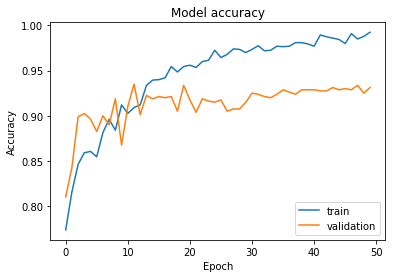

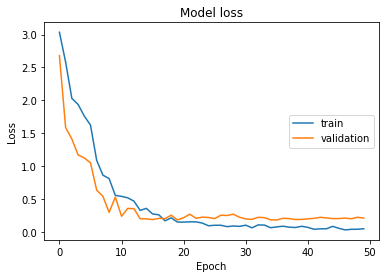

In [4]:
# plot accuracya nd loss plots for train and val data
import matplotlib.pyplot as plt
print(history.history.keys())
# accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='center right')
plt.show()